## Estimation de la moyenne, erreur et variance/covariance
Le but de ce TP est d'un part d'observer dans des exemples simples les estimations de la valeur moyenne (lorsque l'on connnaît la vérité terrain) et de voir comment mesurer l'erreur sur celle-ci.
Dans un second temps, on regardera (toujours sur des cas contrôlés) la signification de la covariance et une façon de réduite naïvement la dimension des données.

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

  * Générer $N_s = 10^{2,3,4,5,6}$ variables Gaussienns de moyennes 0 et de variance 2.
  * Afficher pour chacune des valeurs l'estimation de la valeur moyenne et de la variance. 
  * Comment calcule-t-on l'erreur sur l'estimation de la moyenne ?
  * Vous afficherez les résultats sur un plot en échelle logarithmique pour l'axe x (pourquoi l'échelle log ?). 
  * A l'aide de la fonction 'errorbar' faire un graphe avec la barre d'erreur.
  * Que se passe-t-il si la variance n'est pas 2 mais 10

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  * Générer $N_s = 10^{2,3,4,5,6}$ variables Gaussienns de moyennes 0 et de variance 2.
  * Afficher pour chacune des valeurs l'estimation de la valeur moyenne et de la variance. 
  * Comment calcule-t-on l'erreur sur l'estimation de la moyenne ?


<b>
    <span style="color:red">
        Correction
    </span> 
</b>

On peut estimer l'erreur sur l'estimation avec :
`err` = $\sqrt{\frac{Var(sample)}{\#sample}}$

In [2]:
# Génerer 10^{2,3,4,5,6} variables Gaussienns de moyennes 0 et de variance 2
NbS = np.array(10**np.arange(2,9))
print('NbS =', NbS)
ech = [np.random.normal(0, 2, size=ns) for ns in NbS]
est_m = list(map(np.mean, ech))
est_v = list(map(np.var, ech))
err = [np.sqrt(np.var(e)/ns) for e, ns in zip(ech, NbS)]
    
print("moyennes: ", est_m)
print("variances: ", est_v)
print("erreurs: ", err)

NbS = [      100      1000     10000    100000   1000000  10000000 100000000]
moyennes:  [0.10158799476477924, -0.04318372804423227, -0.02131020913485757, 0.002130321060080637, 0.0009110845343587478, 0.0012502527449428666, -0.00017077876049533292]
variances:  [3.568571821023737, 4.114757890594326, 3.895057140810098, 3.9789076694861207, 4.000635398345179, 3.9961145576989114, 3.999926865978632]
erreurs:  [0.18890663887285, 0.06414637862416184, 0.019735899120156896, 0.006307858328692965, 0.002000158843278498, 0.0006321482862192154, 0.00019999817164110856]


<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

Plus joliement affiché :

In [3]:
pd.DataFrame(dict(NbS=NbS, moyennes=est_m, varaiances=est_v, erreurs=err))

NbS  moyennes  varaiances   erreurs
0        100  0.101588    3.568572  0.188907
1       1000 -0.043184    4.114758  0.064146
2      10000 -0.021310    3.895057  0.019736
3     100000  0.002130    3.978908  0.006308
4    1000000  0.000911    4.000635  0.002000
5   10000000  0.001250    3.996115  0.000632
6  100000000 -0.000171    3.999927  0.000200

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

*  Vous afficherez les résultats sur un plot en échelle logarithmique pour l'axe x (pourquoi l'échelle log ?).
* A l'aide de la fonction 'errorbar' faire un graphe avec la barre d'erreur.

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

Echelle log car sinon on ne voit rien.

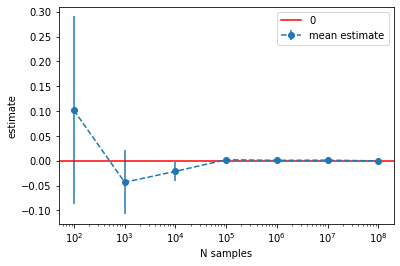

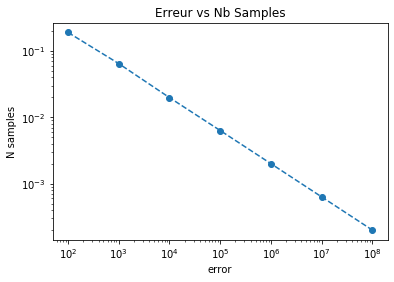

In [4]:
plt.axhline(y=0, c='red', label='0')
plt.errorbar(NbS, est_m, yerr=err, fmt='--o', label='mean estimate')
plt.xscale('log')
plt.ylabel('estimate')
plt.xlabel('N samples')
plt.legend()
plt.show()

plt.loglog(NbS, err, '--o')
plt.title("Erreur vs Nb Samples")
plt.ylabel('N samples')
plt.xlabel('error')
plt.show()

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  * Que se passe-t-il si la variance n'est pas 2 mais 10

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [5]:
# Génerer 10^{2,3,4,5,6} variables Gaussienns de moyennes 0 et de variance 10
NbS = np.array(10**np.arange(2,9))
print('NbS =', NbS)
ech = [np.random.normal(0, 10, size=ns) for ns in NbS]
est_m = list(map(np.mean, ech))
est_v = list(map(np.var, ech))
err = [np.sqrt(np.var(e)/ns) for e, ns in zip(ech, NbS)]
    
print("moyennes: ", est_m)
print("variances: ", est_v)
print("erreurs: ", err)
pd.DataFrame(dict(NbS=NbS, moyennes=est_m, varaiances=est_v, erreurs=err))

NbS = [      100      1000     10000    100000   1000000  10000000 100000000]
moyennes:  [-0.33952695035367, 0.05869624782342746, 0.06312760932413437, 0.021601758125858374, 0.00815327163318642, 8.373884059834593e-05, 0.001202192545363643]
variances:  [89.01449510761995, 105.80754107763225, 98.64314440237273, 100.33032662339134, 99.79819090339812, 100.05324799780826, 99.99959442990615]
erreurs:  [0.9434749339946449, 0.32528071119823915, 0.0993192551333188, 0.031674962766101454, 0.00998990444916257, 0.0031631194728907767, 0.0009999979721474746]


NbS  moyennes  varaiances   erreurs
0        100 -0.339527   89.014495  0.943475
1       1000  0.058696  105.807541  0.325281
2      10000  0.063128   98.643144  0.099319
3     100000  0.021602  100.330327  0.031675
4    1000000  0.008153   99.798191  0.009990
5   10000000  0.000084  100.053248  0.003163
6  100000000  0.001202   99.999594  0.001000

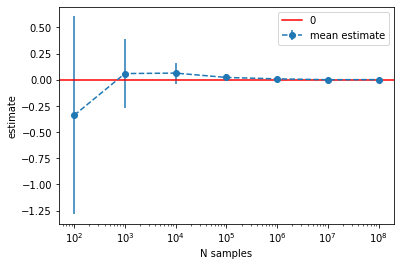

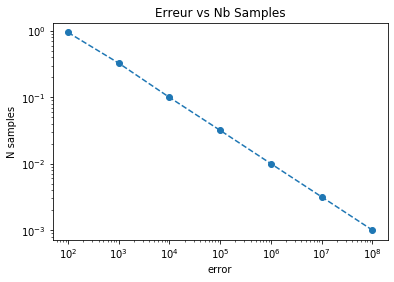

In [6]:
plt.axhline(y=0, c='red', label='0')
plt.errorbar(NbS, est_m, yerr=err, fmt='--o', label='mean estimate')
plt.xscale('log')
plt.ylabel('estimate')
plt.xlabel('N samples')
plt.legend()
plt.show()
plt.title("Erreur vs Nb Samples")
plt.loglog(NbS,err, '--o')
plt.ylabel('N samples')
plt.xlabel('error')
plt.show()

On voit que l'erreur décroit avec le nombre d'échantillon. La décroissance est en loi de puissance.
L'erreur augment avec la variance.

<b>
    <span style="color:green">
        Sujet
    </span> 
</b>

Dans le fichier "data_ping.d", sont enregistrés les données du temps de ping vers un serveur.
  * Tracer l'histogramme des valeurs, que constatez-vous ?
  * Estimez la valeur moyenne et son erreur

A l'aide de la fonction "np.random.permutation":
  * obtenez $200$ estimations (dans un tableau) de la valeur moyenne en prenant $30$ valeurs aléatoire parmis le jeu de données.
  * Faites l'histogramme des valeurs obtenues. 
  * En utilisant l'histogramme, pouvez-vous devinez la distribution obtenue ? (vous pouvez aussi tracer l'histogramme avec l'option "log=True" pour mettre l'échelle y en log)
  * Tracer la distribution intuitée pour s'en assurer, que remarquez-vous ?
  
Bonus : sur la distribution des valeurs du ping, saurez-vous estimez le comportement de la distribution pour les "grandes" valeurs de ping ?

<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  * Tracer l'histogramme des valeurs, que constatez-vous ?
  * Estimez la valeur moyenne et son erreur

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [7]:
data = np.genfromtxt("data_ping.d")


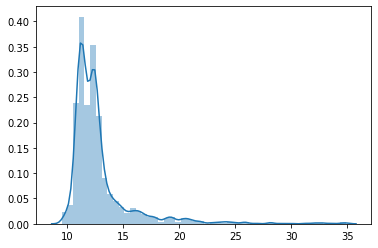

In [8]:
try:
    import seaborn as sns
    sns.distplot(data)
    plt.show()
except ImportError:
    pass

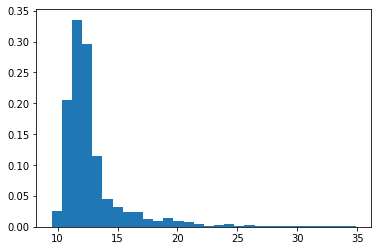

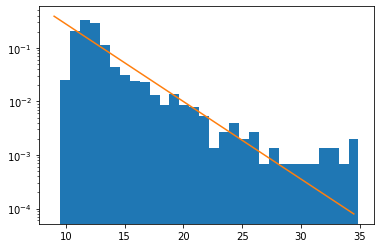

In [9]:

plt.hist(data, bins=30, density=True)
plt.show()

#comportement exponentiel
x_range = np.arange(9,35,0.5)
plt.hist(data, bins=30, log=True, density=True)
plt.plot(x_range, np.exp( - (x_range - 11.0) / 3 ) / 5)
plt.show()


In [10]:
estimate_mean = np.mean(data)
n_samples = data.shape[0]
estimate_mean_error = np.sqrt(np.var(data)/n_samples)


In [11]:
print("estimate mean = {} +/- {}".format(estimate_mean, estimate_mean_error))

estimate mean = 12.836788732394366 +/- 0.06962971430582307


<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  * obtenez $200$ estimations (dans un tableau) de la valeur moyenne en prenant $30$ valeurs aléatoire parmis le jeu de données.

<b>
    <span style="color:red">
        Correction
    </span> 
</b>

In [12]:
# Version 0
N = 2000
estimated_means = []
for _ in range(2000):
    idx = np.random.permutation(np.arange(n_samples))
    idx = idx[30:]
    data_sample = data[idx]
    data_sample_mean = np.mean(data_sample)
    estimated_means.append(data_sample_mean)


In [13]:
# Version 1
N = 2000
random_permutation = np.array([np.random.permutation(np.arange(n_samples)) for i in range(N)])
estimated_means = np.array([np.mean(data[idx[:30]]) for idx in random_permutation])


<b>
    <span style="color:orange">
        Question
    </span> 
</b>

  * Faites l'histogramme des valeurs obtenues. 
  * En utilisant l'histogramme, pouvez-vous devinez la distribution obtenue ? (vous pouvez aussi tracer l'histogramme avec l'option "log=True" pour mettre l'échelle y en log)
  * Tracer la distribution intuitée pour s'en assurer, que remarquez-vous ?


<b>
    <span style="color:red">
        Correction
    </span> 
</b>

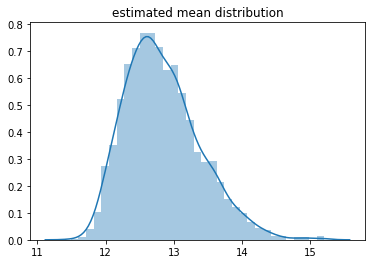

In [14]:
sns.distplot(estimated_means)
plt.title('estimated mean distribution')
plt.show()

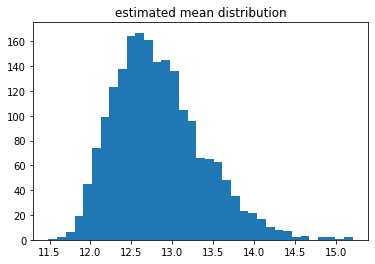

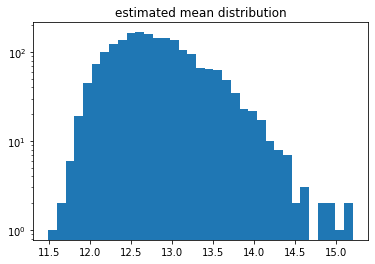

In [15]:
plt.hist(estimated_means, 35)
plt.title('estimated mean distribution')
plt.show()

plt.hist(estimated_means, 35, log=True)
plt.title('estimated mean distribution')
plt.show()

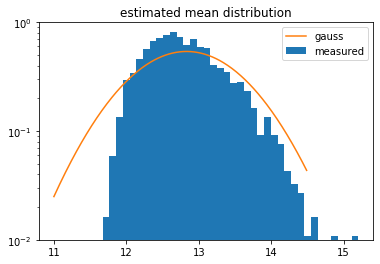

In [16]:
# on definit la pdf
def gauss(x, m, s):
    return 1/np.sqrt(2*np.pi*s) * np.exp(-(x-m)**2 / (2.0*s) )

myx = np.arange(11, 14.5, 0.01)
mu, beta = 12.6, 0.4
count, bins, ignored = plt.hist(estimated_means, bins=40, density=True, log=True, label='measured')
plt.ylim(0.01, 1)
plt.semilogy(myx, gauss(myx, np.mean(estimated_means), np.std(estimated_means)), label='gauss')
plt.title('estimated mean distribution')
plt.legend()
plt.show()

La distribution gaussienne semble caractériser les fluctucations sur la valeur moyenne, on a évidement des phénomènes de coupure à gauche.

<b>
    <span style="color:purple">
        Remarques
    </span> 
</b>

on a **"évidement"** des phénomènes de coupure à gauche ??

Due à la longue queue de la ditribution de data.